In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot
import nltk

sms = pd.read_csv("spam.csv", engine='python')

In [2]:
from nltk.tokenize import word_tokenize
from nltk import punkt
from nltk.corpus import stopwords

In [3]:
# overlook of the data we have

In [4]:
sms

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
sms.index

RangeIndex(start=0, stop=5572, step=1)

In [6]:
sms.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
# To see which information is in the columns 2,3, and 4 that do not have NaN value

In [8]:
sms_check = sms.loc[:,['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']].dropna(how='all')
sms_check.head()

,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,"this wont even start........ Datz confidence..""",NaN,NaN


In [9]:
sms = sms.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [10]:
sms.columns = ['label','messages']
sms.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
sms['length'] = sms['messages'].apply(len)
sms.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
sms.groupby('label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.021347  58.014768   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.429719  29.049857  13.0  132.0  149.0  157.0  223.0

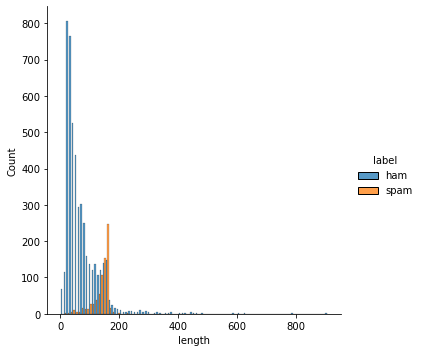

In [13]:
sns.displot(sms, x='length',hue='label', multiple = "dodge")

In [14]:
# Text processing/cleansing- romove punctuation, stopwords.

In [15]:
import string

stop = stopwords.words('english')

def txtprocess(messages):
    
    nopunc = [char for char in messages if char not in string.punctuation] 
    
    nopunc = ''.join(nopunc)

    return ' '.join([word.lower() for word in nopunc.split() if word.lower() not in stop])

In [16]:
sms['processed'] = sms.messages.apply(txtprocess)
sms.head()

,label,messages,length,processed
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think goes usf lives around though


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
# Vectorization/Tokenization - I used the same code that we had on the tutorial. 
# However we can change details to raise the accuracy

In [19]:
rx = '[a-zA-Z]{3,20}'
cv = CountVectorizer(max_df=0.95, min_df=3, max_features=10000, stop_words='english', token_pattern = rx)

cvf = cv.fit_transform(sms["processed"])
print(cv.get_feature_names())
print(cvf.toarray().shape)

['aah', 'aathilove', 'aathiwhere', 'abi', 'abiola', 'able', 'abt', 'abta', 'acc', 'accept', 'access', 'accident', 'accidentally', 'account', 'accounts', 'ache', 'action', 'activate', 'activities', 'actually', 'add', 'added', 'addie', 'address', 'admirer', 'adore', 'adult', 'advance', 'advice', 'advise', 'affairs', 'affection', 'afraid', 'aft', 'afternoon', 'aftr', 'age', 'ages', 'ago', 'aha', 'ahead', 'ahmad', 'aight', 'aint', 'air', 'airport', 'aiya', 'aiyah', 'aiyar', 'aiyo', 'alcohol', 'alert', 'alex', 'alfie', 'allah', 'alright', 'alrite', 'alwys', 'amazing', 'american', 'amp', 'amt', 'angry', 'announcement', 'ans', 'ansr', 'answer', 'answering', 'answers', 'anti', 'anybody', 'anymore', 'anythin', 'anytime', 'anyways', 'apartment', 'apologise', 'app', 'apparently', 'apply', 'appointment', 'appreciate', 'apps', 'appt', 'april', 'arcade', 'ard', 'area', 'arent', 'argh', 'argue', 'argument', 'armand', 'arms', 'arng', 'arrange', 'arrested', 'arrive', 'art', 'arun', 'asap', 'ask', 'askd

In [20]:
# Modeling - using Naive bayes.

In [21]:
label = sms['label'].map({'ham': 0, 'spam': 1})
label

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

In [22]:
x = cv.fit_transform(sms["processed"])
y = label

In [23]:
# split sets into train/test

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = classifier.predict(x_test)

print(classification_report(y_test, pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test, pred))
print()
print('Accuracy : ',accuracy_score(y_test, pred))

NameError: name 'classifier' is not defined